## 引入库

In [153]:
import matplotlib.pyplot as plt
import numpy as np

## 读取数据

In [154]:
data_file = './watermelon3.0alpha.csv'
data = np.loadtxt(data_file, skiprows=1, delimiter=",")
data

array([[ 1.    ,  0.697 ,  0.46  ,  1.    ],
       [ 2.    ,  0.774 ,  0.376 ,  1.    ],
       [ 3.    ,  0.634 ,  0.264 ,  1.    ],
       [ 4.    ,  0.608 ,  0.318 ,  1.    ],
       [ 5.    ,  0.556 ,  0.215 ,  1.    ],
       [ 6.    ,  0.403 ,  0.237 ,  1.    ],
       [ 7.    ,  0.481 ,  0.149 ,  1.    ],
       [ 8.    ,  0.437 ,  0.211 ,  1.    ],
       [ 9.    ,  0.666 ,  0.091 ,  0.    ],
       [10.    ,  0.243 ,  0.0267,  0.    ],
       [11.    ,  0.245 ,  0.057 ,  0.    ],
       [12.    ,  0.343 ,  0.099 ,  0.    ],
       [13.    ,  0.639 ,  0.161 ,  0.    ],
       [14.    ,  0.657 ,  0.198 ,  0.    ],
       [15.    ,  0.36  ,  0.37  ,  0.    ],
       [16.    ,  0.593 ,  0.042 ,  0.    ],
       [17.    ,  0.719 ,  0.103 ,  0.    ]])

In [ ]:
X = data[:,1:3] 
y = data[:,3:]
X0 = np.ones(np.shape(X)[0])
X = np.c_[X, X0.T]

In [167]:
import xlrd
workbook = xlrd.open_workbook("3.0alpha.xls")
sheet = workbook.sheet_by_name("Sheet1")
X1 = np.array(sheet.row_values(0))
X2 = np.array(sheet.row_values(1))

#this is the extension of x
X3 = np.array(sheet.row_values(2))
y = np.array(sheet.row_values(3))
X = np.vstack([X1, X2, X3]).T
y = y.reshape(-1, 1)

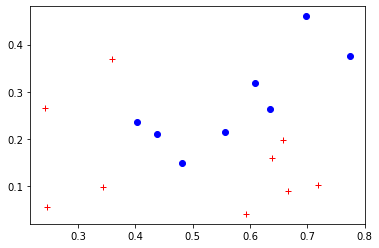

In [168]:
for i in range(X.shape[0]):
    if y[i, 0] == 0:
        plt.plot(X[i,0], X[i,1], 'r+')
    else:
        plt.plot(X[i,0], X[i,1], 'bo')

## 牛顿法

In [158]:
def sigmoid(x):
    """
    Sigmoid function.
    Input:
        x:np.array
    Return:
        y: the same shape with x
    """
    y =1.0 / ( 1 + np.exp(-x))
    return y

In [159]:
def newton(X, y):
    """
    Input:
        X: np.array with shape [N, 3]. Input.
        y: np.array with shape [N, 1]. Label.
    Return:
        beta: np.array with shape [1, 3]. Optimal params with newton method
    """
    N = X.shape[0]
    #initialization
    beta = np.ones((1, 3))

    #shape [N, 1]
    z = X.dot(beta.T)

    #log-likehood
    old_l = 0
    new_l = np.sum(-y*z + np.log( 1+np.exp(z) )) #计算对数似然的代价函数值
    # iters是迭代次数
    iters = 0
    while( np.abs(old_l - new_l) > 1e-5):
        #shape [N, 1]
        p1 = np.exp(z) / (1 + np.exp(z))

        #shape [N, N]
        p = np.diag((p1 * (1-p1)).reshape(N))

        #shape [1, 3]
        first_order = -np.sum(X * (y - p1), 0, keepdims=True)
        #shape [3, 3]
        second_order = X.T .dot(p).dot(X)

        #update
        beta -= first_order.dot(np.linalg.inv(second_order))
        z = X.dot(beta.T)
        old_l = new_l
        new_l = np.sum(-y*z + np.log( 1+np.exp(z) ) )

        iters += 1
    print("牛顿法收敛的迭代次数iters: ", iters)
    print('牛顿法收敛后对应的代价函数值: ', new_l)
    return beta

In [169]:
beta1 = newton(X, y)
newton_left = -( beta1[0, 0]*0.1 + beta1[0, 2] ) / beta1[0, 1]
newton_right = -( beta1[0, 0]*0.9 + beta1[0, 2] ) / beta1[0, 1] 

牛顿法收敛的迭代次数iters:  6
牛顿法收敛后对应的代价函数值:  8.683660584232863


In [170]:
beta1

array([[ 3.15832966, 12.52119579, -4.42886451]])

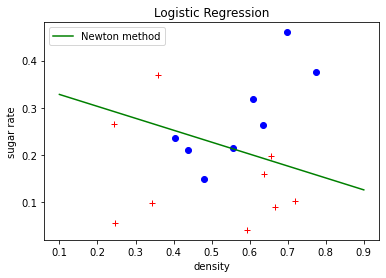

In [171]:
for i in range(X.shape[0]):
        if y[i, 0] == 0:
            plt.plot(X[i,0], X[i,1], 'r+')

        else:
            plt.plot(X[i,0], X[i,1], 'bo')
plt.plot([0.1, 0.9], [newton_left, newton_right], 'g-', label='Newton method')
plt.legend()

plt.xlabel('density')
plt.ylabel('sugar rate')
plt.title("Logistic Regression")
plt.show()

## 梯度下降法

In [172]:
def first_order(z, X, y):
    p1 = np.exp(z) / (1+np.exp(z))
    return -np.sum(X * (y - p1), 0, keepdims=True)

def gradient_descent(X, y, step=0.01, tranning_times=5000):
    step = 0.01
    beta = np.zeros((1,3))
    for i in range(tranning_times):
        z = np.dot(X, beta.T)
        gradient = first_order(z, X ,y)
        beta = beta - step * gradient
    return beta

In [173]:
beta = gradient_descent(X, y)
gradient_left = -( beta[0, 0]*0.1 + beta[0, 2] ) / beta[0, 1]
gradient_right = -( beta[0, 0]*0.9 + beta[0, 2] ) / beta[0, 1] 

In [175]:
beta

array([[ 2.51184511,  9.46468379, -3.44947915]])

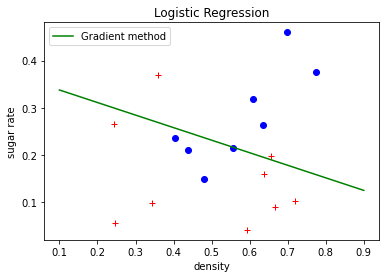

In [174]:
for i in range(X.shape[0]):
        if y[i, 0] == 0:
            plt.plot(X[i,0], X[i,1], 'r+')
        else:
            plt.plot(X[i,0], X[i,1], 'bo')
plt.plot([0.1, 0.9], [gradient_left, gradient_right], 'g-', label='Gradient method')
plt.legend()

plt.xlabel('density')
plt.ylabel('sugar rate')
plt.title("Logistic Regression")
plt.show()